In [1]:
from NeuralNetwork2 import ANN2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import joblib

In [2]:
train_data = pd.read_csv('mnist_train.csv',header=None)
test_data = pd.read_csv('mnist_test.csv',header=None)
train_data = train_data.sample(n=600,random_state=1)
test_data = test_data.sample(n=100,random_state=1)

In [3]:
X_train = train_data.iloc[:,1:].values / 255
y_train = train_data.iloc[:,0].values.reshape(X_train.shape[0],1)
X_test = test_data.iloc[:,1:].values / 255
y_test = test_data.iloc[:,0].values.reshape(X_test.shape[0],1)

In [4]:
lr = np.arange(10)
one_hot = []
for label in y_train.ravel():
    one_hot.append((lr==label).astype(np.int).tolist())
y_train = one_hot
one_hot = []
for label in y_test.ravel():
    one_hot.append((lr==label).astype(np.int).tolist())
y_test = one_hot

In [5]:
model = joblib.load('Trained1Network.model')

Target 0
Target [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


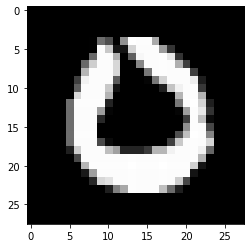

In [6]:
sample = 80
y_pred = model.predict(X_test[sample].reshape(1,784)).ravel()
print("Target {}".format(np.argmax(y_pred)))
print("Target {}".format(y_test[sample]))
plt.imshow(X_test[sample].reshape(28,28),cmap='gray')
plt.show()

In [7]:
X_target = X_test[sample].ravel()
y_goal = y_test[sample+1]

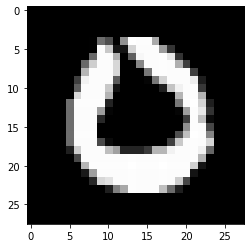

Predicted : 0
Adversial Goal : 4
Predicted : [2.34037258e-01 1.07204375e-07 4.77749336e-02 4.80626876e-05
 3.68782381e-07 7.19419510e-04 3.72595656e-06 6.57809408e-04
 1.20919728e-02 7.10211731e-05]
Adversial Goal : [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


In [28]:
plt.imshow(X_target.reshape(28,28),cmap='gray')
plt.show()
print('Predicted : {}'.format(np.argmax(y_pred)))
print('Adversial Goal : {}'.format(np.argmax(y_goal)))
print('Predicted : {}'.format(y_pred))
print('Adversial Goal : {}'.format(y_goal))

In [24]:
adversial_image = model.get_adversial_image(X_target=X_target,
                                            y_goal=y_goal,
                                            seed=2,
                                            learning_rate=0.01,
                                            _lambda=0.4,
                                            epochs=10000,
                                            print_results=True)

Epoch ---  0  MSE :  [100.22516933]
Epoch ---  100  MSE :  [46.26504581]
Epoch ---  200  MSE :  [22.32854757]
Epoch ---  300  MSE :  [11.55574356]
Epoch ---  400  MSE :  [6.70578251]
Epoch ---  500  MSE :  [4.51523415]
Epoch ---  600  MSE :  [3.51557489]
Epoch ---  700  MSE :  [3.04994653]
Epoch ---  800  MSE :  [2.8285458]
Epoch ---  900  MSE :  [2.72295657]
Epoch ---  1000  MSE :  [2.67309476]
Epoch ---  1100  MSE :  [2.64976147]
Epoch ---  1200  MSE :  [2.63888317]
Epoch ---  1300  MSE :  [2.63380088]
Epoch ---  1400  MSE :  [2.63140493]
Epoch ---  1500  MSE :  [2.63025395]
Epoch ---  1600  MSE :  [2.62968225]
Epoch ---  1700  MSE :  [2.62938262]
Epoch ---  1800  MSE :  [2.62921303]
Epoch ---  1900  MSE :  [2.62910749]
Epoch ---  2000  MSE :  [2.62903506]
Epoch ---  2100  MSE :  [2.628981]
Epoch ---  2200  MSE :  [2.62893806]
Epoch ---  2300  MSE :  [2.62890254]
Epoch ---  2400  MSE :  [2.62887244]
Epoch ---  2500  MSE :  [2.62884654]
Epoch ---  2600  MSE :  [2.62882406]
Epoch ---  

In [25]:
print('Last Epoch Error : ', model.adversial_loss[-1])

Last Epoch Error :  [2.6286613]


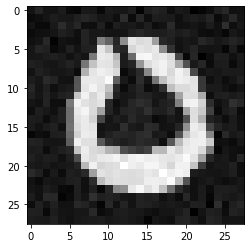

In [26]:
plt.imshow(adversial_image.reshape(28,28),cmap='gray')
plt.show()

Target 0
Target [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


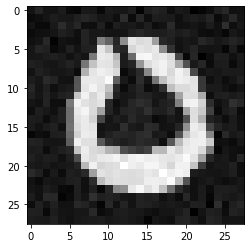

In [29]:
y_pred_adversial = model.predict(adversial_image.reshape(1,784)).ravel()
print("Target {}".format(np.argmax(y_pred_adversial)))
print("Target {}".format(y_test[sample]))
plt.imshow(adversial_image.reshape(28,28),cmap='gray')
plt.show()

In [30]:
y_pred_adversial - y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])